# Pandas (2)
제가 생각하기에, 케이스 스터디를 제외하고 코딩부 수업에서 가장 중요한 부분이 이 부분인 듯합니다.

여러분들이 파이썬을 쓰시면서 가장 많이, 그리고 가장 요긴하게 다룰 내용들 대부분이 이번 내용에 들어 있습니다.

In [1]:
import numpy as np
import pandas as pd

In [2]:
#thousands 옵션은 천 단위 인자를 인식할 수 있도록 알려 주는 역할을 합니다. 이를 지정하지 않으면 숫자 사이에 쉽표가 껴 있는 것으로 보고 string으로 처리하는 문제가 발생합니다.
coins=pd.read_csv("/Users/yihoon-j/Documents/fr/2학기 교안 작업/Coin.csv", thousands=",",index_col=0)
coins

,Bitcoin,Ethereum,Litecoin
Date,,,
"Jul 27, 2023",29190.0,1859.03,90.47
"Jul 26, 2023",29352.2,1872.00,90.66
"Jul 25, 2023",29228.6,1857.67,89.45
"Jul 24, 2023",29178.1,1850.04,89.14
"Jul 23, 2023",30085.9,1888.85,93.15
...,...,...,...
"Jul 31, 2022",23303.4,1680.00,59.77
"Jul 30, 2022",23634.2,1695.97,60.40
"Jul 29, 2022",23774.3,1720.77,60.62


## 불리언 인덱싱
불리언 연산은 수식이나 조건을 충족하면 1로, 아니라면 0으로 하는 연산을 의미하며, 이를 응용한 인덱싱을 불리언 인덱싱이라 합니다.


In [3]:
#불리언 인덱싱을 위해서는 먼저 조건을 찾아야 합니다. True, False로 반환되는 조건을 먼저 만들어 봅시다.
coins['Bitcoin']>31000 #'Bitcoin' 컬럼의 값이 31000보다 큰지 확인하여, 그렇다면 True를, 아니라면 False를 반환합니다.
#열이 많기 때문에 처음 다섯 행과 끝 다섯 행만 출력되어 있습니다.

Date
Jul 27, 2023    False
Jul 26, 2023    False
Jul 25, 2023    False
Jul 24, 2023    False
Jul 23, 2023    False
                ...  
Jul 31, 2022    False
Jul 30, 2022    False
Jul 29, 2022    False
Jul 28, 2022    False
Jul 27, 2022    False
Name: Bitcoin, Length: 366, dtype: bool

**참고**

True는 1에, False는 0에 해당되는 값입니다.

앞서 사용한 조건문에서는 True가 총 두 개 반환됩니다 (출력되는 않았지만요).

따라서 저 조건문의 `sum()`을 수행하면 2가 반환됩니다.


In [44]:
(coins['Bitcoin']>31000).sum()

2

이제 불리언 인덱싱을 수행해 보겠습니다.

앞서 2주차 수업에서 데이터프레임의 인덱싱을 어떻게 하는지 보았습니다.

앞서서 한 것처럼 loc, iloc를 사용하는 것이 아니라, True에 해당하는 행만을 반환하는 방식으로 불리언 인덱싱을 수행합니다.

매 행을 조건과 비교하여 True인 행만 반환해 주는 형태입니다.

In [5]:
coins[coins['Bitcoin']>31000]

,Bitcoin,Ethereum,Litecoin
Date,,,
"Jul 13, 2023",31466.1,2004.77,101.84
"Jul 03, 2023",31151.3,1955.56,107.28


## drop

값을 삭제할 때 사용합니다.

`axis=0` 옵션으로 행을 (default),

`axis=1` 옵션으로 열을 삭제합니다.

In [62]:
coins.drop(['Bitcoin', 'Etherium'], axis=1)

,Ethereum,Litecoin
Date,,
"Jul 27, 2023",1859.03,90.47
"Jul 26, 2023",1872.00,90.66
"Jul 25, 2023",1857.67,89.45
"Jul 24, 2023",1850.04,89.14
"Jul 23, 2023",1888.85,93.15
...,...,...
"Jul 31, 2022",1680.00,59.77
"Jul 30, 2022",1695.97,60.40
"Jul 29, 2022",1720.77,60.62


## sort

데이터프레임을 정렬합니다.

`sort_index` 인덱스를 기준으로 정렬

`sort_values` 컬럼을 기준으로 정렬

In [ ]:
coins.sort_index().loc[::30] #정렬이 어떻게 이루어지는지 쉽게 보여드리기 위해 30개 즉 한 달 간격으로 row를 건너뛰면서 출력하였습니다.

In [7]:
coins.sort_index(ascending=False).loc[::30] #ascending 옵션을 명시하지 않을 경우 오름차순 정렬됩니다. False라고 명시해 주어야만 내림차순 정렬됩니다.


#인덱스 포맷이 문자형으로 인식되기 때문에 알파벳 순(Apr - Aug - Dec - ...)으로 정렬된다.
#날짜 순으로 정렬하는건 뒤에서 다시 다룰게요!

,Bitcoin,Ethereum,Litecoin
Date,,,
"Sep 30, 2022",19423.0,1328.73,53.49
"Oct 31, 2022",20496.3,1572.89,55.04
"Oct 01, 2022",19311.9,1311.80,52.92
"Nov 01, 2022",20483.5,1579.64,55.12
"May 02, 2023",28669.1,1869.74,88.13
"Mar 03, 2023",22354.4,1568.89,90.54
"Jun 03, 2023",27072.0,1892.05,96.02
"Jul 05, 2023",30512.8,1910.43,102.54
"Jan 06, 2023",16950.9,1269.14,75.93


여러 개의 값을 기준으로 정렬할 때는 정렬할 값들을 []로 묶어 줍니다. 첫 번째 값을 기준으로 먼저 정렬하고, 그 다음 두 번째 값을 기준으로 정렬하고,... 의 형태로 정렬됩니다.

In [8]:
coins.sort_values(['Bitcoin', 'Ethereum'])

,Bitcoin,Ethereum,Litecoin
Date,,,
"Nov 21, 2022",15776.2,1107.46,61.34
"Nov 09, 2022",15886.9,1100.84,50.62
"Nov 28, 2022",16211.7,1167.73,73.90
"Nov 22, 2022",16212.9,1139.74,70.61
"Nov 20, 2022",16286.7,1142.88,62.10
...,...,...,...
"Jun 23, 2023",30679.4,1891.97,91.27
"Jun 27, 2023",30689.1,1889.51,88.07
"Jul 04, 2023",30768.4,1936.19,104.18


## rename

행/열 이름 바꾸기

In [9]:
coins.rename(columns={'Bitcoin':'BTC', 'Ethereum':'ETH', 'Litecoin':'LTC'})

,BTC,ETH,LTC
Date,,,
"Jul 27, 2023",29190.0,1859.03,90.47
"Jul 26, 2023",29352.2,1872.00,90.66
"Jul 25, 2023",29228.6,1857.67,89.45
"Jul 24, 2023",29178.1,1850.04,89.14
"Jul 23, 2023",30085.9,1888.85,93.15
...,...,...,...
"Jul 31, 2022",23303.4,1680.00,59.77
"Jul 30, 2022",23634.2,1695.97,60.40
"Jul 29, 2022",23774.3,1720.77,60.62


## pivot
데이터프레임에서의 피봇은 Column을 Row로 혹은 반대로 전환(pivot)하는 것을 뜻합니다.

원래는 피봇이 무엇인지 보여 드린 후 피봇의 역방향 처리 (특별히 정해진 이름은 없습니다만 저는 reverse pivot이라 부르겠습니다)를 보여드리는 게 맞는데,

제가 일하면서 맞닥뜨린 실제 데이터들은 reverse pivot할 일들이 훨씬 많은 듯해서, 순서를 바꿔서 보여 드리겠습니다.

In [10]:
#reverse pivot (stack)
coins_piv=coins.stack().reset_index(name='PRICE').rename(columns={'level_1':'COINS'}).set_index('Date')
coins_piv.head(12)


,COINS,PRICE
Date,,
"Jul 27, 2023",Bitcoin,29190.00
"Jul 27, 2023",Ethereum,1859.03
"Jul 27, 2023",Litecoin,90.47
"Jul 26, 2023",Bitcoin,29352.20
"Jul 26, 2023",Ethereum,1872.00
"Jul 26, 2023",Litecoin,90.66
"Jul 25, 2023",Bitcoin,29228.60
"Jul 25, 2023",Ethereum,1857.67
"Jul 25, 2023",Litecoin,89.45


행 단위로 나열되어 있던 각 코인의 가격이 열 단위로 길게 정렬되었죠?
```
TMI:
이러한 연산은 보통 데이터를 데이터베이스에 저장할 때 사용합니다.
데이터베이스에서 새로운 열을 추가하는 것은 행을 추가하는 것과 비교하면 매우 큰 비용이 발생하기 때문입니다.
따라서 이 때 최대한 열을 줄이고 행을 늘리는 방법을 사용합니다.
```

보시면 코드가 상당히 복잡한데, 물론 이걸 알아두면 좋지만, 솔직히 저도 쓰고 맨날 까먹는 코드입니다.
그냥 '이런 게 있구나'하고 기억해 두셨다가, 필요한 상황이 닥쳤을 때 복붙해서 써먹으시면 충분합니다.

한편, pivot은 방금 살펴본 reverse pivot의 반대 방향 연산입니다.

피봇 함수는 상대적으로 간단하기 때문에 알아 두시면 좋습니다.

데이터가 어떤 형태로 들어가야 하는지를 잘 고민해 보고,

컬럼에는 무엇이 있어야 하는지, 그리고 표의 값은 무엇이 되어야 하는지를 각각 `columns`, `values` 인자에 지정해 줍니다.


In [60]:
#pivot
coins_piv.pivot(columns='COINS', values='PRICE')

COINS,Bitcoin,Ethereum,Litecoin
Date,,,
"Apr 01, 2023",28456.1,1820.78,92.56
"Apr 02, 2023",28198.3,1795.01,92.81
"Apr 03, 2023",27802.1,1810.77,92.98
"Apr 04, 2023",28164.4,1870.52,92.53
"Apr 05, 2023",28173.5,1908.96,92.67
...,...,...,...
"Sep 26, 2022",19225.7,1337.06,53.43
"Sep 27, 2022",19081.0,1328.23,52.65
"Sep 28, 2022",19411.0,1337.37,53.28


## describe
수치형 컬럼의 여러 정보를 반환합니다. 데이터의 분포를 빠르게 파악할 때 유용합니다.

In [83]:
coins['Ethereum'].describe()

count     366.000000
mean     1607.971503
std       251.177637
min      1100.840000
25%      1335.457500
50%      1639.290000
75%      1838.852500
max      2119.290000
Name: Ethereum, dtype: float64

## shift
데이터프레임을 특정 Row만큼 뒤로/앞으로 당길 때 사용합니다.

한 개의 데이터프레임 안에서 과거 값/미래 값을 현재 값과 매치해야 할 때 사용할 수 있습니다.

예를 들어, 3일 후의 주가를 예측해야 할 경우 예측에 사용되는 값들을 `shift(-3)`하여, 3일 이전의 값을 환율과 매칭시켜 학습 모델에 집어넣을 수 있습니다.

In [20]:
coins['Bitcoin'].shift(-2)

Date
Jul 27, 2023    29228.6
Jul 26, 2023    29178.1
Jul 25, 2023    30085.9
Jul 24, 2023    29788.9
Jul 23, 2023    29903.1
                 ...   
Jul 31, 2022    23774.3
Jul 30, 2022    23850.0
Jul 29, 2022    22958.3
Jul 28, 2022        NaN
Jul 27, 2022        NaN
Name: Bitcoin, Length: 366, dtype: float64

## groupby
데이터를 특정 열/인덱스를 기준으로 집계합니다.

In [21]:
#데이터프레임으로 이것저것 가공을 많이 했기 때문에, 원본 파일을 새로 다시 한 번 불러오겠습니다.
coins=pd.read_csv("/Users/yihoon-j/Documents/fr/2학기 교안 작업/Coin.csv", thousands=",",index_col=0)

집계를 위해서는 집계가 가능하도록 공통되는 값이 존재하는 열/인덱스가 필요하기 때문에, 먼저 인덱스를 만들어주는 작업을 수행하겠습니다.

아직 우리가 배우지 않은 내용들이 많기 때문에, 일단은 "이 코드가 월 번호, 주 번호를 만드는 연산이구나"하고만 넘어가 주세요.

해당 코드는 날짜 자료형을 다루면서 다시 설명해드리겠습니다.

In [22]:
import datetime
coins=coins.reset_index()
coins['Month']=coins['Date'].apply(lambda x: datetime.datetime.strptime(x, "%b %d, %Y").strftime('%Y%m')) #각 날짜의 월 번호 만들기
coins['Week']=coins['Date'].apply(lambda x: datetime.datetime.strptime(x, "%b %d, %Y").strftime('%Y%W')) #각 날짜의 주 번호 만들기
coins

,Date,Bitcoin,Ethereum,Litecoin,Month,Week
0,"Jul 27, 2023",29190.0,1859.03,90.47,202307,202330
1,"Jul 26, 2023",29352.2,1872.00,90.66,202307,202330
2,"Jul 25, 2023",29228.6,1857.67,89.45,202307,202330
3,"Jul 24, 2023",29178.1,1850.04,89.14,202307,202330
4,"Jul 23, 2023",30085.9,1888.85,93.15,202307,202329
...,...,...,...,...,...,...
361,"Jul 31, 2022",23303.4,1680.00,59.77,202207,202230
362,"Jul 30, 2022",23634.2,1695.97,60.40,202207,202230
363,"Jul 29, 2022",23774.3,1720.77,60.62,202207,202230
364,"Jul 28, 2022",23850.0,1726.01,63.47,202207,202230


groupby()안에는 집계 대상이 되는 컬럼명을, 그 뒤에는 집계 함수를 지정합니다.

집계 함수는 진짜 정말 많은데.. 제일 많이 쓰는 건 `mean()` `median()` `min()` `max()` `std()` 정도는 다들 지난 학기에 보셨을 거고,

추가로 `ohlc()`를 한번 다뤄 볼게요

In [5]:
coins.groupby('Month').mean()
#집계가 불가능한 Date컬럼은 출력되지 않음
#참고로 여기 뜨는 FutureWarning은 "나중에는 문법 업데이트 돼서 안 될 수도 있다"는 의미입니다.

<ipython-input-5-a25d8ff13365>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  coins.groupby('Month').mean()


,Bitcoin,Ethereum,Litecoin
Month,,,
202207,23504.040000,1691.752000,60.652000
202208,22353.016129,1698.932258,58.368710
202209,19794.286667,1483.870667,56.574000
202210,19647.096774,1367.231935,53.162903
202211,17591.980000,1297.642000,65.468333
202212,16942.287097,1236.584194,71.682581
202301,20242.125806,1466.301935,84.329355
202302,23292.742857,1624.176071,96.256786
202303,25079.564516,1672.958710,85.623226


In [6]:
#ohlc: 시가, 고가, 저가, 종가를 한꺼번에 계산
coins_ohlc=coins.drop(['Date', 'Week'], axis=1).groupby('Month').ohlc() #ohlc는 숫자형 자료형을 기준으로만 집계가 가능합니다
coins_ohlc

Bitcoin                            Ethereum                    \
           open     high      low    close     open     high      low   
Month                                                                   
202207  23303.4  23850.0  22958.3  22958.3  1680.00  1726.01  1636.01   
202208  20043.9  24442.5  19550.2  23271.2  1555.12  1983.50  1426.25   
202209  19423.0  22395.3  18489.0  20126.1  1328.73  1774.38  1247.74   
202210  20496.3  20809.8  19042.9  19311.9  1572.89  1619.69  1274.57   
202211  17163.9  21301.6  15776.2  20483.5  1294.41  1645.01  1100.84   
202212  16537.4  17796.4  16441.3  16972.0  1195.67  1320.76  1166.70   
202301  23125.1  23753.1  16618.4  16618.4  1585.27  1659.98  1200.52   
202302  23130.5  24839.5  21635.0  23725.6  1604.69  1703.27  1505.84   
202303  28473.7  28473.7  20156.7  23642.2  1821.62  1821.62  1426.75   
202304  29252.1  30472.5  27264.8  28456.1  1868.88  2119.29  1795.01   
202305  27216.1  29513.2  26328.4  28077.6  1873.63  1993.33  1794.71   
202306  30472.9  30689.1  25129.5  26819.0  1933.80  1933.80  1650.96   
202307  29190.0  31466.1  29178.1  30586.8  1859.03  2004.77  1848.36   

                Litecoin                         
          close     open    high    low   close  
Month                                            
202207  1636.01    59.77   63.47  59.00   59.00  
202208  1630.10    53.81   63.80  52.67   59.47  
202209  1585.48    53.49   63.28  51.14   57.55  
202210  1311.80    55.04   56.62  50.39   52.92  
202211  1579.64    79.15   79.15  50.62   55.12  
202212  1276.05    70.08   80.18  63.40   77.56  
202301  1200.52    94.14   94.88  70.91   70.91  
202302  1642.10    93.79  102.85  91.07  100.33  
202303  1666.09    89.57   97.85  69.22   97.85  
202304  1820.78    88.14  101.77  85.33   92.56  
202305  1830.75    90.45   93.79  77.78   86.76  
202306  1861.77   108.66  108.66  73.17   94.18  
202307  1924.53    90.47  113.35  89.14  107.34

어라? 컬럼이 이중으로 바뀌어 버렸네요. 컬럼 레벨을 하나로 낮춰 봅시다.

In [53]:
#list comprehension이라는 기법 응용한 컬럼 grade down기법인데, 복붙해서 사용합시다~
coins_ohlc.columns=['_'.join(col) for col in coins_ohlc.columns]
coins_ohlc.head()

,Bitcoin_open,Bitcoin_high,Bitcoin_low,Bitcoin_close,Ethereum_open,Ethereum_high,Ethereum_low,Ethereum_close,Litecoin_open,Litecoin_high,Litecoin_low,Litecoin_close
Month,,,,,,,,,,,,
202207,23303.4,23850.0,22958.3,22958.3,1680.00,1726.01,1636.01,1636.01,59.77,63.47,59.00,59.00
202208,20043.9,24442.5,19550.2,23271.2,1555.12,1983.50,1426.25,1630.10,53.81,63.80,52.67,59.47
202209,19423.0,22395.3,18489.0,20126.1,1328.73,1774.38,1247.74,1585.48,53.49,63.28,51.14,57.55
202210,20496.3,20809.8,19042.9,19311.9,1572.89,1619.69,1274.57,1311.80,55.04,56.62,50.39,52.92
202211,17163.9,21301.6,15776.2,20483.5,1294.41,1645.01,1100.84,1579.64,79.15,79.15,50.62,55.12


집계 기준, 집계 함수 각각을 여러 개로 설정할 수도 있습니다.
이때는 `agg()`를 사용하여 여러 개의 집계 옵션을 지정해 줍니다.

In [144]:
coins.groupby(['Month', 'Week']).agg(['mean', 'ohlc'])

/var/folders/_x/6zxfdhhj0cn8q6l5rd4411y80000gn/T/ipykernel_83917/1837553109.py:1: FutureWarning: ['Date'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  coins.groupby(['Month', 'Week']).agg(['mean', 'ohlc'])


Bitcoin                                         Ethereum  \
                       mean     ohlc                                    mean   
                    Bitcoin     open     high      low    close     Ethereum   
Month  Week                                                                    
202207 202230  23504.040000  23303.4  23850.0  22958.3  22958.3  1691.752000   
202208 202231  23017.200000  23175.3  23308.2  22612.1  23271.2  1659.267143   
       202232  24000.742857  24302.8  24442.5  23146.7  23816.3  1870.170000   
       202233  22569.642857  21517.2  24101.7  20831.3  24101.7  1751.567143   
       202234  20814.014286  19550.2  21565.4  19550.2  21416.3  1581.258571   
...                     ...      ...      ...      ...      ...          ...   
202307 202326  30602.250000  30617.7  30617.7  30586.8  30586.8  1931.050000   
       202327  30449.671429  30166.9  31151.3  29913.1  31151.3  1892.807143   
       202328  30533.757143  30235.5  31466.1  30235.5  30415.3  1918.185714   
       202329  29927.871429  30085.9  30139.7  29788.9  30139.7  1890.792857   
       202330  29237.225000  29190.0  29352.2  29178.1  29178.1  1859.685000   

                                                     Litecoin                  \
                  ohlc                                   mean    ohlc           
                  open     high      low    close    Litecoin    open    high   
Month  Week                                                                     
202207 202230  1680.00  1726.01  1636.01  1636.01   60.652000   59.77   63.47   
202208 202231  1700.29  1737.71  1606.94  1630.10   59.910000   61.11   62.48   
       202232  1935.10  1983.50  1702.80  1778.42   62.151429   63.13   63.80   
       202233  1618.25  1900.25  1575.60  1900.25   58.010000   55.48   61.29   
       202234  1426.25  1695.37  1426.25  1626.75   55.194286   53.38   57.24   
...                ...      ...      ...      ...         ...     ...     ...   
202307 202326  1937.57  1937.57  1924.53  1924.53  110.345000  113.35  113.35   
       202327  1862.91  1955.56  1848.36  1955.56  100.071429   95.12  107.28   
       202328  1922.45  2004.77  1871.86  1880.42   96.338571   92.87  101.84   
       202329  1888.85  1911.24  1866.25  1911.24   92.488571   93.15   94.10   
       202330  1859.03  1872.00  1850.04  1850.04   89.930000   90.47   90.66   

                               
                               
                  low   close  
Month  Week                    
202207 202230   59.00   59.00  
202208 202231   57.75   59.47  
       202232   59.17   62.63  
       202233   54.03   60.69  
       202234   52.67   57.24  
...               ...     ...  
202307 202326  107.34  107.34  
       202327   95.12  107.28  
       202328   92.87   96.76  
       202329   91.58   92.18  
       202330   89.14   89.14  

[63 rows x 15 columns]

## join
두 개의 데이터프레임을 하나로 병합합니다.

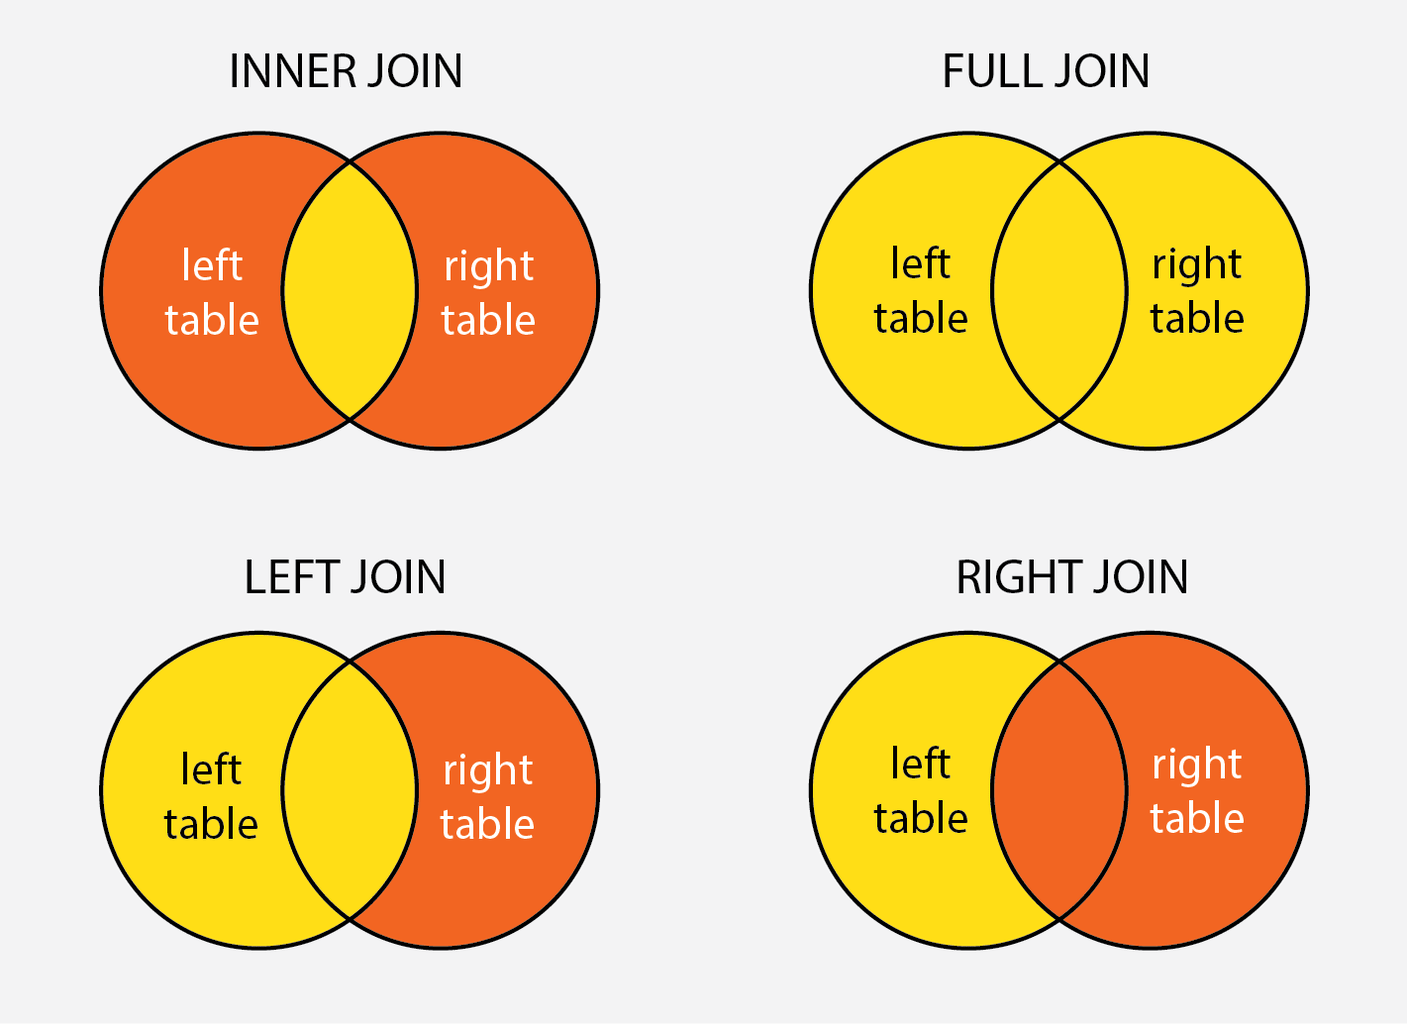

실제 데이터를 사용하는 것보다는 간단한 데이터프레임으로 직접 확인하는 게 더 이해가 잘 될 거 같아서, 데이터프레임 간단히 만들어서 확인해 볼게요.

In [35]:
#ㄱㄱ그룹 계열사 재무제표
df1=pd.DataFrame({'PER':[5.3,11.4, 3.3], 'PBR':[1.2, 0.7, 2.1]}, index=['ㄱㄱ전자', 'ㄱㄱ중공업', 'ㄱㄱ솔루션'])
df1

,PER,PBR
ㄱㄱ전자,5.3,1.2
ㄱㄱ중공업,11.4,0.7
ㄱㄱ솔루션,3.3,2.1


In [36]:
#중공업 상장사 직원 수 비교
df2=pd.DataFrame({'직원수':['5천','16천', '20천']}, index=['ㄱㄱ중공업', 'ㄴㄴ중공업', 'ㄷㄷ중공업'])
df2

,직원수
ㄱㄱ중공업,5천
ㄴㄴ중공업,16천
ㄷㄷ중공업,20천


In [37]:
df1.join(df2,how='left') #inner(default), outer, left, default

,PER,PBR,직원수
ㄱㄱ전자,5.3,1.2,NaN
ㄱㄱ중공업,11.4,0.7,5천
ㄱㄱ솔루션,3.3,2.1,NaN


**참고**
- 세 개 이상의 데이터프레임을 붙일 때는 데이터프레임들을`[]`로 묶어서 합칩니다. `df1.join([df2,df3,df4], how='inner']` 이런 식으로!
- 이때 left join시 가장 왼쪽 인덱스를 기준으로 조인되며, right join은 불가합니다.
- 조인되었을 때 동일한 이름의 열이 있으면 조인이 수행되지 않습니다.